In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

In [2]:
file_path = 'C:/Users/lrodr/OneDrive/Documentos/master_ucm/trabajos/9/datos_tarea25.xlsx'  # Reemplaza con la ruta correcta de tu archivo

df = pd.read_excel(file_path)
print(df.head())
print(f'\nLa frecuencia de cada clase es: \n{df.Color.value_counts()}')

   Price  Levy   Manufacturer  Prod. year   Category Leather interior  \
0  39493   891        HYUNDAI        2016       Jeep              Yes   
1   1803   761         TOYOTA        2010  Hatchback              Yes   
2   1098   394         TOYOTA        2014      Sedan              Yes   
3    941  1053  MERCEDES-BENZ        2014      Sedan              Yes   
4   1019  1055          LEXUS        2013       Jeep              Yes   

  Fuel type Engine volume    Mileage  Cylinders Gear box type Drive wheels  \
0    Diesel             2  160931 km          4     Automatic        Front   
1    Hybrid           1.8  258909 km          4     Automatic        Front   
2    Hybrid           2.5  398069 km          4     Automatic        Front   
3    Diesel           3.5  184467 km          6     Automatic         Rear   
4    Hybrid           3.5  138038 km          6     Automatic        Front   

        Wheel  Color  Airbags  
0  Left wheel  White        4  
1  Left wheel  White       1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Price             4340 non-null   int64 
 1   Levy              4340 non-null   object
 2   Manufacturer      4340 non-null   object
 3   Prod. year        4340 non-null   int64 
 4   Category          4340 non-null   object
 5   Leather interior  4340 non-null   object
 6   Fuel type         4340 non-null   object
 7   Engine volume     4340 non-null   object
 8   Mileage           4340 non-null   object
 9   Cylinders         4340 non-null   int64 
 10  Gear box type     4340 non-null   object
 11  Drive wheels      4340 non-null   object
 12  Wheel             4340 non-null   object
 13  Color             4340 non-null   object
 14  Airbags           4340 non-null   int64 
dtypes: int64(4), object(11)
memory usage: 508.7+ KB


In [4]:
for col in ['Manufacturer', 'Category', 'Fuel type', 'Gear box type', 'Drive wheels', 'Color']:
    print(df[col].value_counts(), "\n")

Manufacturer
TOYOTA           1547
HYUNDAI          1234
MERCEDES-BENZ     932
LEXUS             627
Name: count, dtype: int64 

Category
Sedan        2317
Jeep         1510
Hatchback     513
Name: count, dtype: int64 

Fuel type
Petrol    2172
Hybrid    1248
Diesel     920
Name: count, dtype: int64 

Gear box type
Automatic    3691
Tiptronic     649
Name: count, dtype: int64 

Drive wheels
Front    2692
4x4      1175
Rear      473
Name: count, dtype: int64 

Color
Black    2327
White    2013
Name: count, dtype: int64 



Parece que modelo de árbol de decisión para predecir el color del coche, puede resultar adecuado pues no tenemos una gran cantidad de variables numéricas en nuestro dataset, sino que hay predominancia de variables nominales con pocas categorías.

In [5]:
# Categorizar la variable de respuesta
#df['Color'] = df['Color'].apply(lambda x: 1 if x == 'White' else 0)
print(df.head(50))

    Price   Levy   Manufacturer  Prod. year   Category Leather interior  \
0   39493    891        HYUNDAI        2016       Jeep              Yes   
1    1803    761         TOYOTA        2010  Hatchback              Yes   
2    1098    394         TOYOTA        2014      Sedan              Yes   
3     941   1053  MERCEDES-BENZ        2014      Sedan              Yes   
4    1019   1055          LEXUS        2013       Jeep              Yes   
5   59464    891        HYUNDAI        2016       Jeep              Yes   
6     549   1079         TOYOTA        2018       Jeep              Yes   
7   28382    810        HYUNDAI        2016      Sedan              Yes   
8     941   1850          LEXUS        2008       Jeep              Yes   
9   17562   1249         TOYOTA        2017      Sedan              Yes   
10  20385      -  MERCEDES-BENZ        2006      Sedan              Yes   
11    549   2455          LEXUS        2008       Jeep              Yes   
12     30      -         

In [6]:
df['Mileage'] = df['Mileage'].str.replace(' km', '', regex=True).astype(int)  
df.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,39493,891,HYUNDAI,2016,Jeep,Yes,Diesel,2,160931,4,Automatic,Front,Left wheel,White,4
1,1803,761,TOYOTA,2010,Hatchback,Yes,Hybrid,1.8,258909,4,Automatic,Front,Left wheel,White,12
2,1098,394,TOYOTA,2014,Sedan,Yes,Hybrid,2.5,398069,4,Automatic,Front,Left wheel,Black,12
3,941,1053,MERCEDES-BENZ,2014,Sedan,Yes,Diesel,3.5,184467,6,Automatic,Rear,Left wheel,White,12
4,1019,1055,LEXUS,2013,Jeep,Yes,Hybrid,3.5,138038,6,Automatic,Front,Left wheel,White,12


In [7]:
df["Levy"] = pd.to_numeric(df["Levy"], errors="coerce")
df["Engine volume"] = df["Engine volume"].str.extract(r"([\d.]+)").astype(float)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             4340 non-null   int64  
 1   Levy              3696 non-null   float64
 2   Manufacturer      4340 non-null   object 
 3   Prod. year        4340 non-null   int64  
 4   Category          4340 non-null   object 
 5   Leather interior  4340 non-null   object 
 6   Fuel type         4340 non-null   object 
 7   Engine volume     4340 non-null   float64
 8   Mileage           4340 non-null   int32  
 9   Cylinders         4340 non-null   int64  
 10  Gear box type     4340 non-null   object 
 11  Drive wheels      4340 non-null   object 
 12  Wheel             4340 non-null   object 
 13  Color             4340 non-null   object 
 14  Airbags           4340 non-null   int64  
dtypes: float64(2), int32(1), int64(4), object(8)
memory usage: 491.8+ KB
None


In [8]:
df.describe()

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags
count,4340.000000,3696.000000,4340.00000,4340.000000,4.340000e+03,4340.000000,4340.000000
mean,19161.052765,981.525974,2012.84977,2.614747,3.960525e+05,4.916129,7.884101
std,23990.524855,553.004177,3.59624,1.013176,1.686423e+07,1.429085,4.600287
min,3.000000,87.000000,1943.00000,0.000000,0.000000e+00,1.000000,0.000000
25%,1725.000000,640.000000,2011.00000,1.800000,6.991800e+04,4.000000,4.000000
50%,14113.000000,836.000000,2013.00000,2.400000,1.275150e+05,4.000000,10.000000
75%,27065.000000,1172.000000,2015.00000,3.500000,1.865420e+05,6.000000,12.000000
max,627220.000000,11714.000000,2020.00000,6.300000,1.111111e+09,12.000000,16.000000


In [9]:
nominales = ['Manufacturer', 'Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel']  
df = pd.get_dummies(df, columns=nominales, drop_first=True)
X = df.drop(columns=['Color'])
y = df['Color']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# ES IMPORTANTE QUE LA DISTRIBUCIÓN DE LAS CLASES SEA 'SIMILAR' EN TRAIN Y TEST.
print(f'La frecuencia de cada clase en train es: \n{y_train.value_counts(normalize=True)}')
print(f'\nLa frecuencia de cada clase en test es: \n{y_test.value_counts(normalize=True)}')

La frecuencia de cada clase en train es: 
Color
Black    0.542915
White    0.457085
Name: proportion, dtype: float64

La frecuencia de cada clase en test es: 
Color
Black    0.509217
White    0.490783
Name: proportion, dtype: float64


In [11]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [1, 2, 3, 5, 10, 20],
    'min_samples_split': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
scoring_metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), 
                           param_grid=params, 
                           cv=4, scoring=scoring_metrics, refit='accuracy')
grid_search.fit(X_train, y_train)

c:\Users\lrodr\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 3, 5, 10, 20],
                         'min_samples_split': [5, 10, 20, 50, 100]},
             refit='accuracy',
             scoring=['accuracy', 'precision_macro', 'recall_macro',
                      'f1_macro'])

In [12]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=2,
                       min_samples_split=5)


In [13]:
params = {
    'max_depth': [10, 15, 20, 25, 30],
    'min_samples_leaf': [1, 2, 3, 5, 10],
    'min_samples_split': [2, 3, 4, 5, 6, 7],
    'criterion': ["gini", "entropy"]
}
scoring_metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), 
                           param_grid=params, 
                           cv=4, scoring=scoring_metrics, refit='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25, 30],
                         'min_samples_leaf': [1, 2, 3, 5, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7]},
             refit='accuracy',
             scoring=['accuracy', 'precision_macro', 'recall_macro',
                      'f1_macro'])

In [14]:
results = pd.DataFrame(grid_search.cv_results_)
print("Resultados de Grid Search:")
print(results[['params', 'mean_test_accuracy', 'mean_test_precision_macro', 'mean_test_recall_macro', 'mean_test_f1_macro']])
print(grid_search.best_estimator_)

Resultados de Grid Search:
                                                params  mean_test_accuracy  \
0    {'criterion': 'gini', 'max_depth': 10, 'min_sa...            0.743376   
1    {'criterion': 'gini', 'max_depth': 10, 'min_sa...            0.744528   
2    {'criterion': 'gini', 'max_depth': 10, 'min_sa...            0.741359   
3    {'criterion': 'gini', 'max_depth': 10, 'min_sa...            0.739055   
4    {'criterion': 'gini', 'max_depth': 10, 'min_sa...            0.736463   
..                                                 ...                 ...   
295  {'criterion': 'entropy', 'max_depth': 30, 'min...            0.712270   
296  {'criterion': 'entropy', 'max_depth': 30, 'min...            0.713710   
297  {'criterion': 'entropy', 'max_depth': 30, 'min...            0.710541   
298  {'criterion': 'entropy', 'max_depth': 30, 'min...            0.712558   
299  {'criterion': 'entropy', 'max_depth': 30, 'min...            0.713134   

     mean_test_precision_macro  mean

In [15]:
# se selecciona el modelo candidato, y se procede a analizar su robustez a lo largo de cross validation.
res_0 = results[['split0_test_accuracy', 'split1_test_accuracy','split2_test_accuracy', 'split3_test_accuracy']].iloc[0]
res_1 = results[['split0_test_accuracy', 'split1_test_accuracy','split2_test_accuracy', 'split3_test_accuracy']].iloc[1]
res_2 = results[['split0_test_accuracy', 'split1_test_accuracy','split2_test_accuracy', 'split3_test_accuracy']].iloc[2]
res_3 = results[['split0_test_accuracy', 'split1_test_accuracy','split2_test_accuracy', 'split3_test_accuracy']].iloc[3]
res_4 = results[['split0_test_accuracy', 'split1_test_accuracy','split2_test_accuracy', 'split3_test_accuracy']].iloc[4]
res_5 = results[['split0_test_accuracy', 'split1_test_accuracy','split2_test_accuracy', 'split3_test_accuracy']].iloc[5]
res_10 = results[['split0_test_accuracy', 'split1_test_accuracy','split2_test_accuracy', 'split3_test_accuracy']].iloc[10]
res_15 = results[['split0_test_accuracy', 'split1_test_accuracy','split2_test_accuracy', 'split3_test_accuracy']].iloc[15]

C:\Users\lrodr\AppData\Local\Temp\ipykernel_23516\534662342.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([res_0.values,res_1.values,res_2.values,res_3.values,res_4.values,res_5.values,res_10.values,res_15.values], labels = ['res_0','res_1','res_2','res_3','res_4','res_5','res_10','res_15'])


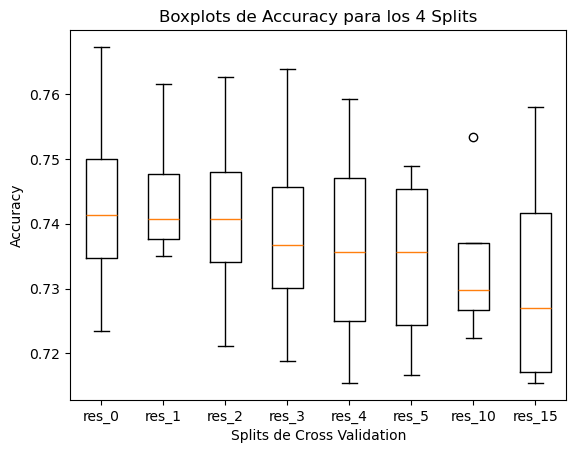

In [16]:
plt.boxplot([res_0.values,res_1.values,res_2.values,res_3.values,res_4.values,res_5.values,res_10.values,res_15.values], labels = ['res_0','res_1','res_2','res_3','res_4','res_5','res_10','res_15'])
plt.title('Boxplots de Accuracy para los 4 Splits')
plt.xlabel('Splits de Cross Validation')
plt.ylabel('Accuracy')
plt.show()

In [17]:
params = results['params'].iloc[10]
best_model = DecisionTreeClassifier(**params)
best_model.fit(X_train, y_train)
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [18]:
params

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 6}

In [19]:
print(best_model.classes_)
print(best_model.feature_names_in_)
tree_rules = export_text(best_model, feature_names=list(X.columns),show_weights=True)
print(tree_rules)

['Black' 'White']
['Price' 'Levy' 'Prod. year' 'Engine volume' 'Mileage' 'Cylinders'
 'Airbags' 'Manufacturer_LEXUS' 'Manufacturer_MERCEDES-BENZ'
 'Manufacturer_TOYOTA' 'Category_Jeep' 'Category_Sedan'
 'Leather interior_Yes' 'Fuel type_Hybrid' 'Fuel type_Petrol'
 'Gear box type_Tiptronic' 'Drive wheels_Front' 'Drive wheels_Rear'
 'Wheel_Right-hand drive']
|--- Engine volume <= 2.30
|   |--- Manufacturer_MERCEDES-BENZ <= 0.50
|   |   |--- Fuel type_Petrol <= 0.50
|   |   |   |--- Price <= 2116.50
|   |   |   |   |--- Airbags <= 7.00
|   |   |   |   |   |--- Mileage <= 190438.50
|   |   |   |   |   |   |--- Levy <= 615.50
|   |   |   |   |   |   |   |--- Levy <= 585.50
|   |   |   |   |   |   |   |   |--- Mileage <= 108000.00
|   |   |   |   |   |   |   |   |   |--- Price <= 55.00
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 5.00] class: White
|   |   |   |   |   |   |   |   |   |--- Price >  55.00
|   |   |   |   |   |   |   |   |   |   |--- weights: [2.00, 2.00] class:

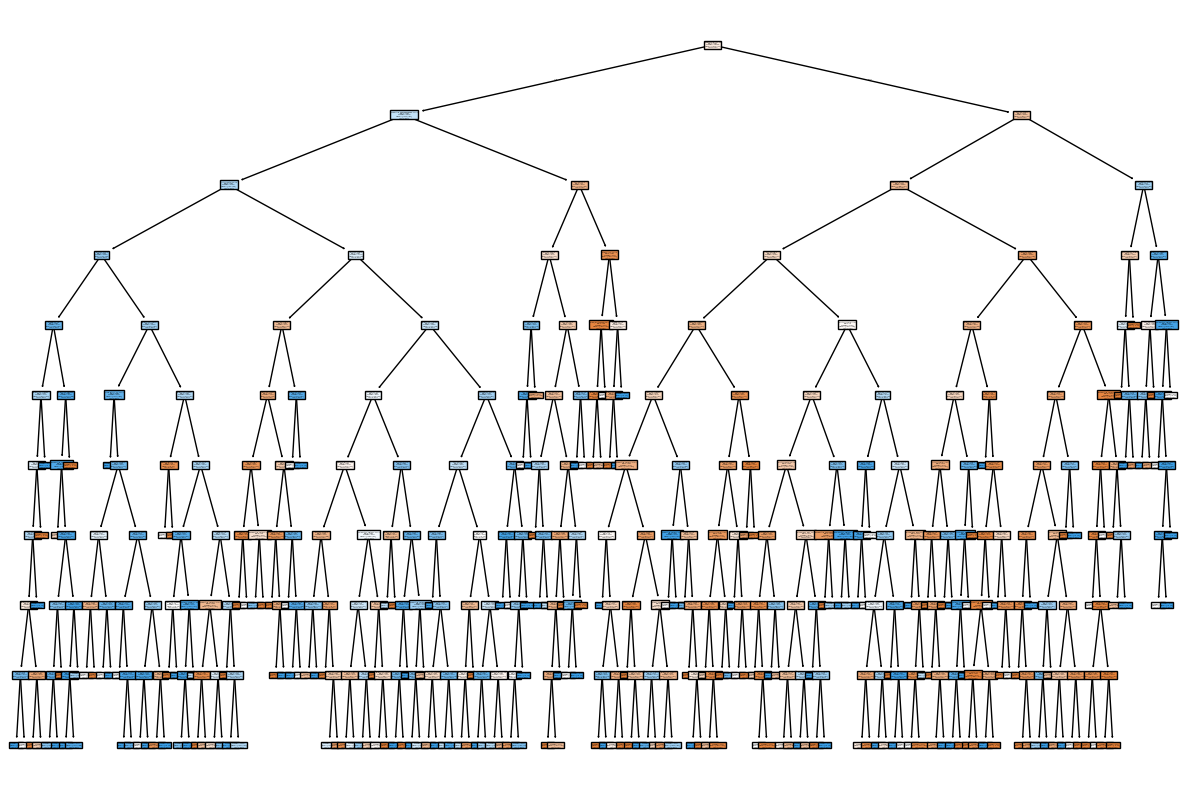

In [20]:
plt.figure(figsize=(15, 10))
plot_tree(best_model, feature_names=X.columns.tolist(), class_names=['Black', 'White'], filled=True,
         proportion = True)
plt.show()

In [21]:
print(pd.DataFrame({'nombre': best_model.feature_names_in_, 'importancia': best_model.feature_importances_}))

                        nombre  importancia
0                        Price     0.214923
1                         Levy     0.128334
2                   Prod. year     0.074973
3                Engine volume     0.183875
4                      Mileage     0.211369
5                    Cylinders     0.006410
6                      Airbags     0.034382
7           Manufacturer_LEXUS     0.000000
8   Manufacturer_MERCEDES-BENZ     0.039847
9          Manufacturer_TOYOTA     0.016839
10               Category_Jeep     0.004020
11              Category_Sedan     0.003605
12        Leather interior_Yes     0.001343
13            Fuel type_Hybrid     0.031533
14            Fuel type_Petrol     0.022512
15     Gear box type_Tiptronic     0.005212
16          Drive wheels_Front     0.011420
17           Drive wheels_Rear     0.008493
18      Wheel_Right-hand drive     0.000908


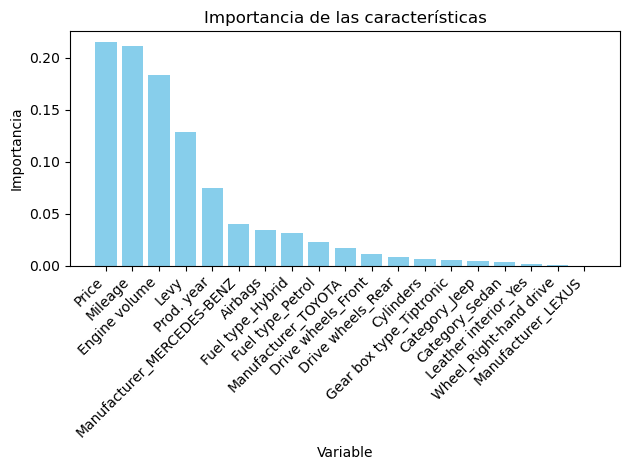

In [22]:
df_importancia = pd.DataFrame({'Variable': best_model.feature_names_in_, 'Importancia': best_model.feature_importances_}).sort_values(by='Importancia', ascending=False)
plt.bar(df_importancia['Variable'], df_importancia['Importancia'], color='skyblue')
plt.xlabel('Variable')
plt.ylabel('Importancia')
plt.title('Importancia de las características')
plt.xticks(rotation=45, ha='right')  # Rotar los nombres en el eje x para mayor legibilidad
plt.tight_layout()
plt.show()

In [23]:
conf_matrix = confusion_matrix(y_train, y_train_pred)
print("Matriz de Confusión (Train):")
print(conf_matrix)
print("\nMedidas de Desempeño (Test):")
print(classification_report(y_train, y_train_pred))

Matriz de Confusión (Train):
[[1604  281]
 [ 283 1304]]

Medidas de Desempeño (Test):
              precision    recall  f1-score   support

       Black       0.85      0.85      0.85      1885
       White       0.82      0.82      0.82      1587

    accuracy                           0.84      3472
   macro avg       0.84      0.84      0.84      3472
weighted avg       0.84      0.84      0.84      3472



In [24]:
y_train_auc = pd.get_dummies(y_train,drop_first=True)
# Calcular el área bajo la curva ROC (AUC)
y_prob_train = best_model.predict_proba(X_train)[:, 1]

fpr, tpr, thresholds = roc_curve(y_train_auc, y_prob_train)
roc_auc = auc(fpr, tpr)
print(f"\nÁrea bajo la curva ROC (AUC): {roc_auc:.2f}")


Área bajo la curva ROC (AUC): 0.93


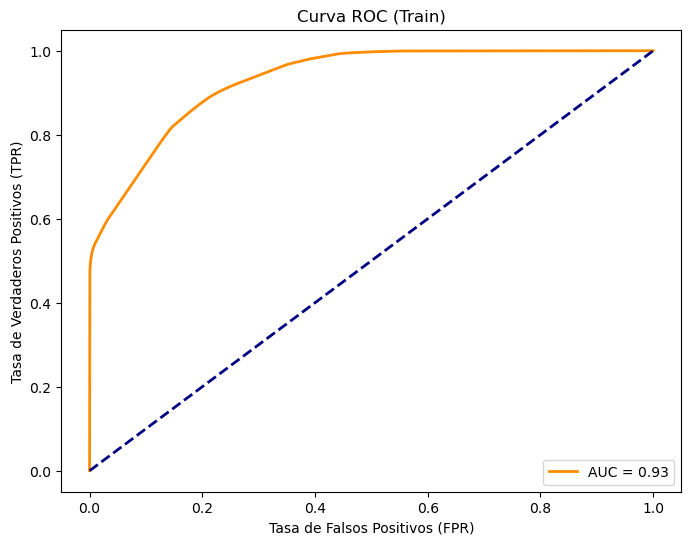

In [25]:
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC (Train)')
plt.legend(loc="lower right")
plt.show()

In [26]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Matriz de Confusión (Test):")
print(conf_matrix)
print("\nMedidas de Desempeño (Test):")
print(classification_report(y_test, y_test_pred))

Matriz de Confusión (Test):
[[346  96]
 [ 95 331]]

Medidas de Desempeño (Test):
              precision    recall  f1-score   support

       Black       0.78      0.78      0.78       442
       White       0.78      0.78      0.78       426

    accuracy                           0.78       868
   macro avg       0.78      0.78      0.78       868
weighted avg       0.78      0.78      0.78       868



In [27]:
y_test_auc = pd.get_dummies(y_test,drop_first=True)
# Calcular el área bajo la curva ROC (AUC)
y_prob_test = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_auc, y_prob_test)
roc_auc_test = auc(fpr, tpr)
print(f"\nÁrea bajo la curva ROC (AUC): {roc_auc:.2f}")


Área bajo la curva ROC (AUC): 0.93


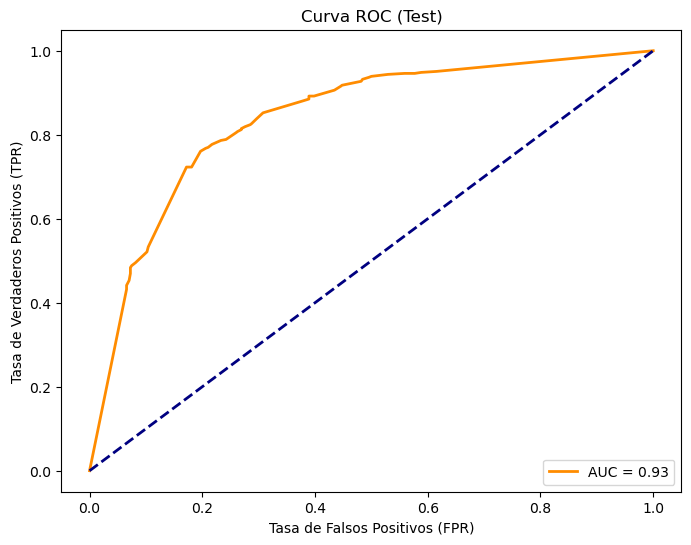

In [28]:
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC (Test)')
plt.legend(loc="lower right")
plt.show()